In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats

In [2]:
df = pd.read_csv("bicicletas-compartidas.csv")

In [3]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [8]:
# Frecuencia compartida
ycat = df["cuartil-ano"]
ycat = ycat.apply(lambda x: "Cat-" + str(int(x)))

In [12]:
valores, conteo_freq = np.unique(ycat, return_counts=True)
valores, conteo_freq

tabla_frequencias = dict(zip(valores, conteo_freq))
tabla_frequencias

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [15]:
# Variable numérica
ynum = df["viento"].copy()
np.min(ynum), np.max(ynum)

(0.0, 56.5)

In [17]:
np.percentile(ynum, q=100)

56.5

In [19]:
np.median(ynum)

15.0

In [22]:
# Cuartiles
valores = [0, 25, 50, 75, 100]
np.percentile(ynum, q=valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [25]:
# Quintiles
valores_quintiles = [0, 20, 40, 60, 80, 100]
np.percentile(ynum, q=valores_quintiles)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [33]:
y = df["bicis-compartidas"]
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [37]:
# Valores atípicos (outlier)
Q1 = np.percentile(ynum, q = 25)
Q3 = np.percentile(ynum, q = 75)

RI = Q3 - Q1

lim_inf = Q1-1.5*RI
lim_sup = Q3+1.5*RI

[lim_inf, lim_sup]

[-5.75, 36.25]

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <a list of 10 Patch objects>)

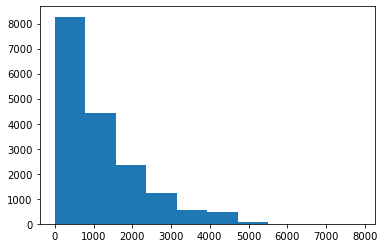

In [40]:
plt.hist(y)